# 6.5 Unsupervised Machine Learning - Clustering

## Contents

#### 1. Importing libraries and data

#### 2. Standardizing Data + Principal Components Analysis

#### 3. the Elbow Technique

#### 4. k-means clustering

#### 5. Descriptive Statistics on established segments

#### 6. Final Analysis

### 1. Importing Libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import datetime
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# For standardizing features, we'll import StandardScaler module.
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
%matplotlib inline

In [3]:
#Setting path to Achievement 6 master folder
path = r'/Users/jeremyobach/Documents/Data Analytics/CareerFoundry/Achievement 6 - Self Designed Project/Austin Airbnb Project - MASTER FOLDER'
#checking path set correctly
path

'/Users/jeremyobach/Documents/Data Analytics/CareerFoundry/Achievement 6 - Self Designed Project/Austin Airbnb Project - MASTER FOLDER'

In [4]:
# delimiting columns displayed
pd.options.display.max_columns = None

In [5]:
# Importing data from 6.4 - Entire home listings from 23 Dec ATX Airbnb Scrape

df =pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data','listings_64.csv'), index_col = False)

In [6]:
df.head()

# will need to remove categorical columns from the df (similar to 6.2)

,Unnamed: 0,id,listing_url,host_id,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,neighbourhood_cleansed,latitude,longitude,property_type,accommodates,beds,price,number_of_reviews,number_of_reviews_l30d,first_review,last_review,review_scores,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,host_listings,reviews_per_month,bathrooms,estimated_occupancy,EROR,estimated_revenue
0,0,5456,https://www.airbnb.com/rooms/5456,8028,2009-02-16,100.0,97.0,True,78702,30.26057,-97.73441,Entire guesthouse,3,2.0,101.0,668,1,2009-03-08,2023-11-20,4.84,4.88,4.86,4.89,4.83,4.73,4.79,1,3.71,1.0,22.26,Medium occupancy,2248.26
1,1,6448,https://www.airbnb.com/rooms/6448,14156,2009-04-20,100.0,100.0,True,78704,30.26034,-97.76487,Entire guesthouse,2,2.0,159.0,312,2,2011-09-06,2023-12-04,4.97,4.97,4.96,4.99,4.97,4.97,4.89,1,2.09,1.0,12.54,Medium occupancy,1993.86
2,2,8502,https://www.airbnb.com/rooms/8502,25298,2009-07-11,100.0,50.0,True,78741,30.23466,-97.73682,Entire guest suite,2,1.0,48.0,51,0,2010-02-19,2023-05-16,4.56,4.52,4.70,4.84,4.87,4.67,4.60,1,0.30,1.0,1.80,Low occupancy,86.40
3,3,13035,https://www.airbnb.com/rooms/13035,50793,2009-11-02,100.0,93.0,True,78702,30.26098,-97.73072,Entire home,3,2.0,123.0,18,0,2011-03-16,2023-06-19,5.00,4.94,4.94,5.00,5.00,5.00,4.94,2,0.12,2.0,0.72,Very low occupancy,88.56
4,4,18258,https://www.airbnb.com/rooms/18258,39458,2009-09-18,100.0,96.0,True,78745,30.19756,-97.78754,Entire bungalow,2,2.0,100.0,20,1,2022-10-25,2023-11-22,5.00,5.00,5.00,5.00,5.00,4.60,4.95,1,1.44,2.0,8.64,Medium occupancy,864.00


In [7]:
# Removing categorical variables/ columns

df.drop(columns = ['Unnamed: 0','id','host_id',
                   'host_is_superhost','listing_url', 
                   'property_type', 'EROR'], inplace = True)

In [8]:
# Creating a variable for months since a listing's first review
# As a proxy for listing age

df['first_review'] = pd.to_datetime(df['first_review'])

In [9]:
# Definining target date

scrape_date = pd.to_datetime('2023-12-23')

In [10]:
# Deriving the number of months between each date and the target date

df['est_listing_age'] = ((scrape_date.year - df['first_review'].dt.year) * 12 + 
                          (scrape_date.month - df['first_review'].dt.month))

In [11]:
df.drop(columns = ['host_since', 'first_review', 'last_review'], inplace = True)

In [12]:
df.head()

,host_response_rate,host_acceptance_rate,neighbourhood_cleansed,latitude,longitude,accommodates,beds,price,number_of_reviews,number_of_reviews_l30d,review_scores,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,host_listings,reviews_per_month,bathrooms,estimated_occupancy,estimated_revenue,est_listing_age
0,100.0,97.0,78702,30.26057,-97.73441,3,2.0,101.0,668,1,4.84,4.88,4.86,4.89,4.83,4.73,4.79,1,3.71,1.0,22.26,2248.26,177
1,100.0,100.0,78704,30.26034,-97.76487,2,2.0,159.0,312,2,4.97,4.97,4.96,4.99,4.97,4.97,4.89,1,2.09,1.0,12.54,1993.86,147
2,100.0,50.0,78741,30.23466,-97.73682,2,1.0,48.0,51,0,4.56,4.52,4.70,4.84,4.87,4.67,4.60,1,0.30,1.0,1.80,86.40,166
3,100.0,93.0,78702,30.26098,-97.73072,3,2.0,123.0,18,0,5.00,4.94,4.94,5.00,5.00,5.00,4.94,2,0.12,2.0,0.72,88.56,153
4,100.0,96.0,78745,30.19756,-97.78754,2,2.0,100.0,20,1,5.00,5.00,5.00,5.00,5.00,4.60,4.95,1,1.44,2.0,8.64,864.00,14


In [13]:
df.shape

(8404, 23)



#### DONE:
- Remove categorical columns
- Standardize data/ variable scales
- elbow technique
- make informed decision about clusters in your k-means algo 
    - 5 looked good with PCA/k-means
- attach new column to df with resulting clusters, allowing to create a visualization with these clusters
- create a few different visualizations (e.g. scatterplots) using clustered data
    - try plotting different variables against each other to see the results in terms of the clusters
- Calculate the descriptive statistics for your clusters using the groupby() function and discuss findings
- Discuss how and why the clusters make sense/ or why not
- Calculate the descriptive statistics for your clusters using the groupby() function and discuss findings
- Propose what these results could be useful for in future steps of an analytics pipeline



### 2. Standardization // Scaling data + PCA Dimensionality Redux

In [14]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df)

#### Dimensionality Reduction with PCA (Prinicipal Components Analysis)

In [15]:
pca = PCA()
pca.fit(segmentation_std)

PCA()

Deciding how many features to keep based on cumulative variance plot;

In [16]:
pca.explained_variance_ratio_

array([0.23545825, 0.15403824, 0.13591745, 0.06784217, 0.05526036,
       0.05207897, 0.04363292, 0.03877447, 0.03452664, 0.02800921,
       0.02583028, 0.02078526, 0.02004626, 0.01790194, 0.01259466,
       0.0121719 , 0.01034657, 0.00886763, 0.00744052, 0.0068092 ,
       0.00520668, 0.00457921, 0.00188122])

Text(0, 0.5, 'Cumulative Explained Variance')

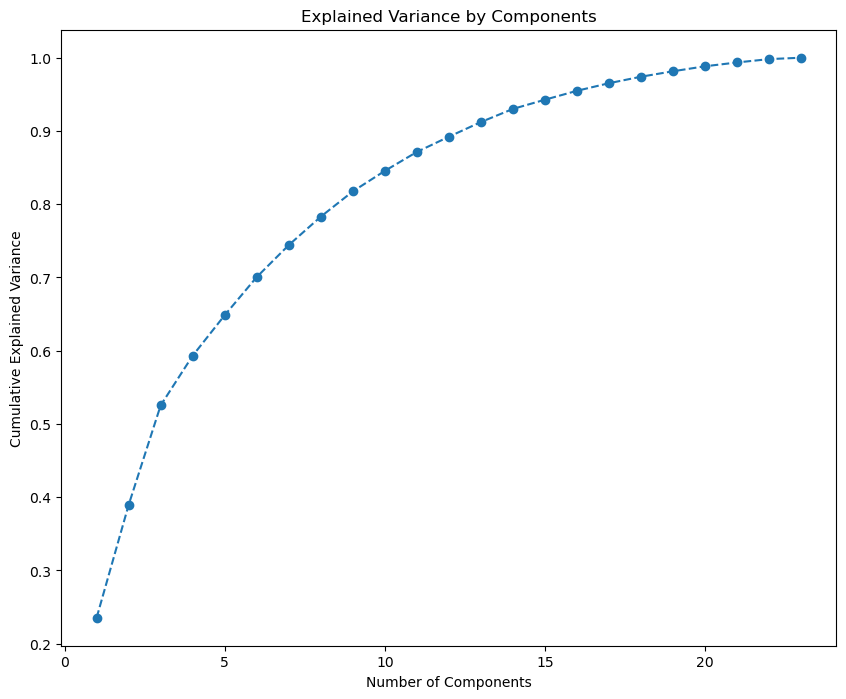

In [17]:
plt.figure(figsize = (10,8))
plt.plot(range(1,24), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title ('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [18]:
# Choosing nine components; we can see that the threshold of 80% variance is crossed between 8 and 9 in the previous graph.

pca = PCA(n_components = 9)

In [19]:
pca.fit(segmentation_std)

PCA(n_components=9)

In [20]:
pca.transform(segmentation_std)

array([[-0.88234667,  4.04741217,  0.61345765, ..., -0.9480443 ,
        -0.52472005, -1.07295437],
       [-1.51900309,  2.01902168, -0.52758301, ..., -0.11019815,
        -0.2918685 , -0.22559617],
       [ 1.71103817, -0.23793195, -2.72890702, ..., -0.25544349,
         0.37776378, -1.39940094],
       ...,
       [12.83119181,  1.9585941 ,  0.41694752, ...,  1.34681321,
         1.59042299,  4.03899526],
       [-1.07688991, -0.72149369, -0.94205092, ..., -0.91626712,
         0.45563435, -0.09721188],
       [-0.67164913, -0.22127621, -1.24332531, ...,  0.05527115,
        -2.28216267, -1.60764373]])

In [21]:
scores_pca = pca.transform(segmentation_std)

### 3. Elbow Technique -- to determine number of clusters

In [22]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [23]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))]
# Creates a score that represents a rate of variation for the given cluster option.
score

/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_

[-21368191303.232704,
 -7688417101.734626,
 -3797963916.104251,
 -2371358126.8272467,
 -1678101530.514779,
 -1290346294.0110316,
 -1058885492.3787826,
 -906984414.0017012,
 -804412041.9916096]

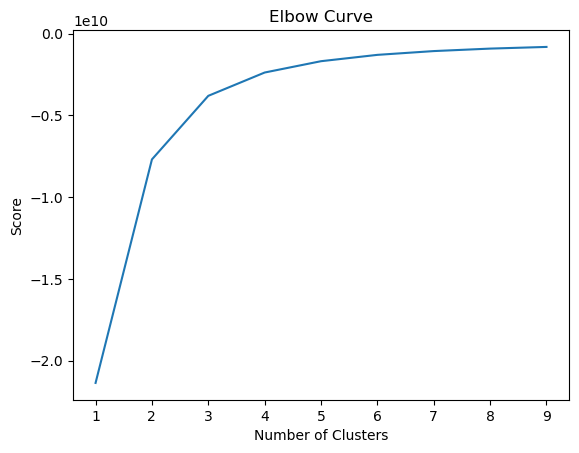

In [24]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

trying alternate technique for K-means clustering from 365 data science below

In [25]:
# We git K-means using the transformed data from the PCA
wcss = []
for i in range (1,21):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_

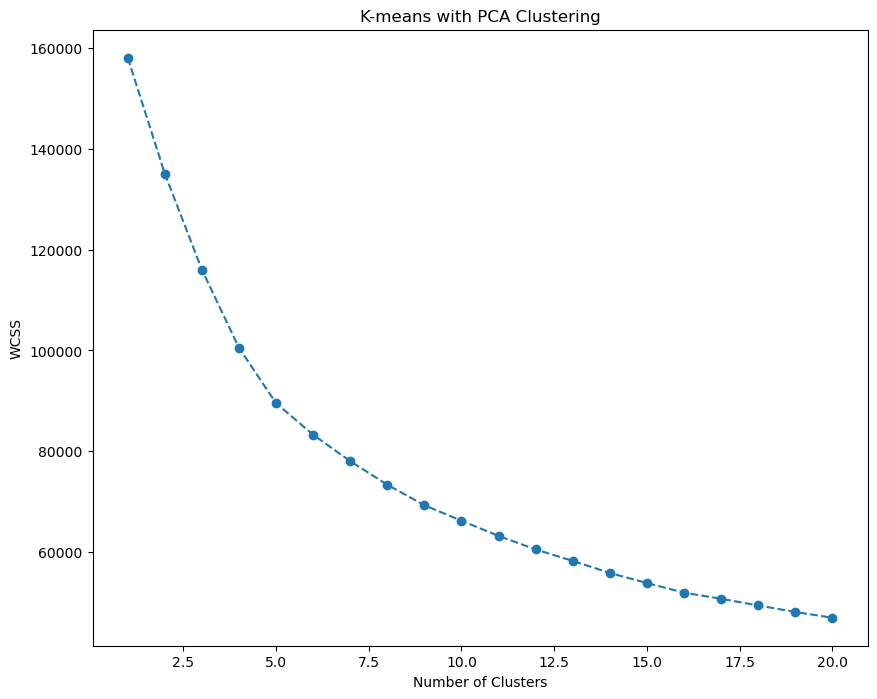

In [26]:
plt.figure(figsize = (10,8))
plt.plot(range(1,21), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')
plt.show()

#### Going to proceed with the latter technique for determining clusters
It takes into account our PCA dimension redux


### 4. k-means clustering

In [27]:
# 5 clusters
# same initializer and random state as before.

kmeans_pca = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)

In [28]:
# Fitting the data with k-means pca model
kmeans_pca.fit(scores_pca)

/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5, random_state=42)

#### Creating dataframe with original features and add the PCA scores and assigned clusters

In [29]:
df_pca_kmeans = pd.concat([df.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_pca_kmeans.columns.values[-9: ] = ['Component 1', 'Component 2','Component 3',
                                      'Component 4','Component 5', 'Component 6',
                                      'Component 7','Component 8','Component 9']
df_pca_kmeans ['Segment K-means PCA'] = kmeans_pca.labels_

In [30]:
df_pca_kmeans.head()

,host_response_rate,host_acceptance_rate,neighbourhood_cleansed,latitude,longitude,accommodates,beds,price,number_of_reviews,number_of_reviews_l30d,review_scores,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,host_listings,reviews_per_month,bathrooms,estimated_occupancy,estimated_revenue,est_listing_age,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Component 8,Component 9,Segment K-means PCA
0,100.0,97.0,78702,30.26057,-97.73441,3,2.0,101.0,668,1,4.84,4.88,4.86,4.89,4.83,4.73,4.79,1,3.71,1.0,22.26,2248.26,177,-0.882347,4.047412,0.613458,6.160885,-2.477835,-0.026666,-0.948044,-0.524720,-1.072954,1
1,100.0,100.0,78704,30.26034,-97.76487,2,2.0,159.0,312,2,4.97,4.97,4.96,4.99,4.97,4.97,4.89,1,2.09,1.0,12.54,1993.86,147,-1.519003,2.019022,-0.527583,3.804307,-1.581428,-0.446830,-0.110198,-0.291868,-0.225596,1
2,100.0,50.0,78741,30.23466,-97.73682,2,1.0,48.0,51,0,4.56,4.52,4.70,4.84,4.87,4.67,4.60,1,0.30,1.0,1.80,86.40,166,1.711038,-0.237932,-2.728907,3.309597,-1.064722,0.897223,-0.255443,0.377764,-1.399401,2
3,100.0,93.0,78702,30.26098,-97.73072,3,2.0,123.0,18,0,5.00,4.94,4.94,5.00,5.00,5.00,4.94,2,0.12,2.0,0.72,88.56,153,-0.938102,-0.941661,-2.054100,2.741041,-1.190948,-1.068930,-0.651434,0.080698,-0.201356,2
4,100.0,96.0,78745,30.19756,-97.78754,2,2.0,100.0,20,1,5.00,5.00,5.00,5.00,5.00,4.60,4.95,1,1.44,2.0,8.64,864.00,14,-0.722644,0.007666,-1.171950,-0.879499,0.003838,-0.072573,1.058129,1.088189,-1.293346,2


In [31]:
# Add the names of the segments to the labels
df_pca_kmeans['Segment'] = df_pca_kmeans['Segment K-means PCA'].map({0:'first',
                                                                   1:'second',
                                                                   2:'third',
                                                                   3: 'fourth',
                                                                   4: 'fifth'})

/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

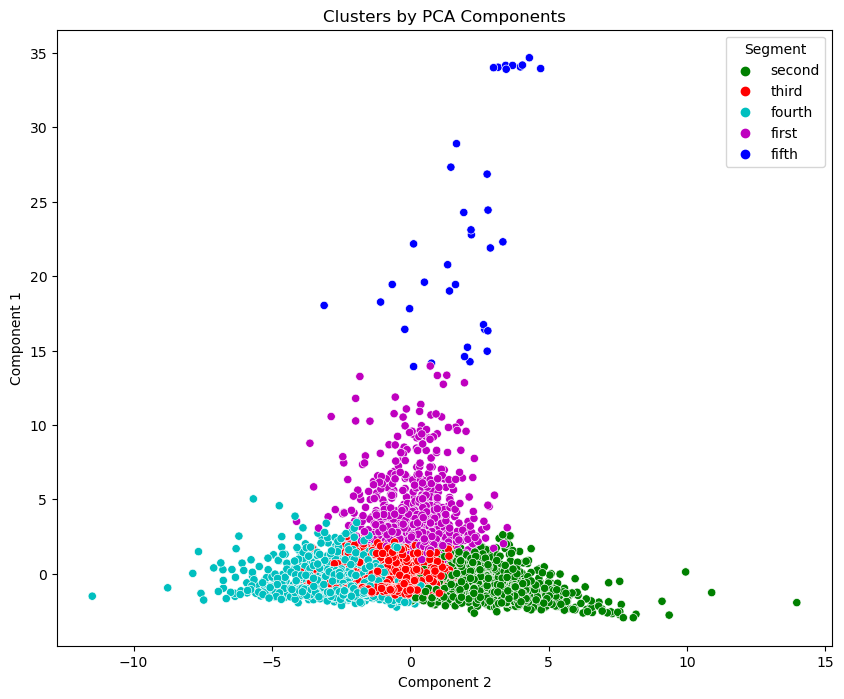

In [39]:
# Plot data by PCA Components. THe Y axis is component 1, x-axis is component 2
x_axis = df_pca_kmeans['Component 2']
y_axis = df_pca_kmeans['Component 1']
plt.figure(figsize = (10,8))
sns.scatterplot(x=x_axis, y=y_axis, hue = df_pca_kmeans['Segment'], palette =['g','r','c','m','b'])
plt.title('Clusters by PCA Components')
plt.show()

In [33]:
df_pca_kmeans['Segment'].value_counts()

Segment
third     4357
second    1989
fourth    1287
first      733
fifth       38
Name: count, dtype: int64

1st- or purple, appears to be average in terms of X and greater than average in terms of y.

2nd - or green,  appears to be higher than average in terms of X and average to below average in terms of y.

3rd - or red, appears to be the average listing. Though appearing small on the plot above, they represent the most listings in the value count.

4th - or cyan, appears to be lower than average in terms of X, and average in terms of y.

5th - or blue, appears to be extreme upper outliers in terms of Y, and mostly the average in terms of x.


#### Seeign decent segmentation but this begs the question which of the original variables is contriubting most to components 1 and 2?

Let's use the clusters we've established to check out some relationships between established variables.

/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

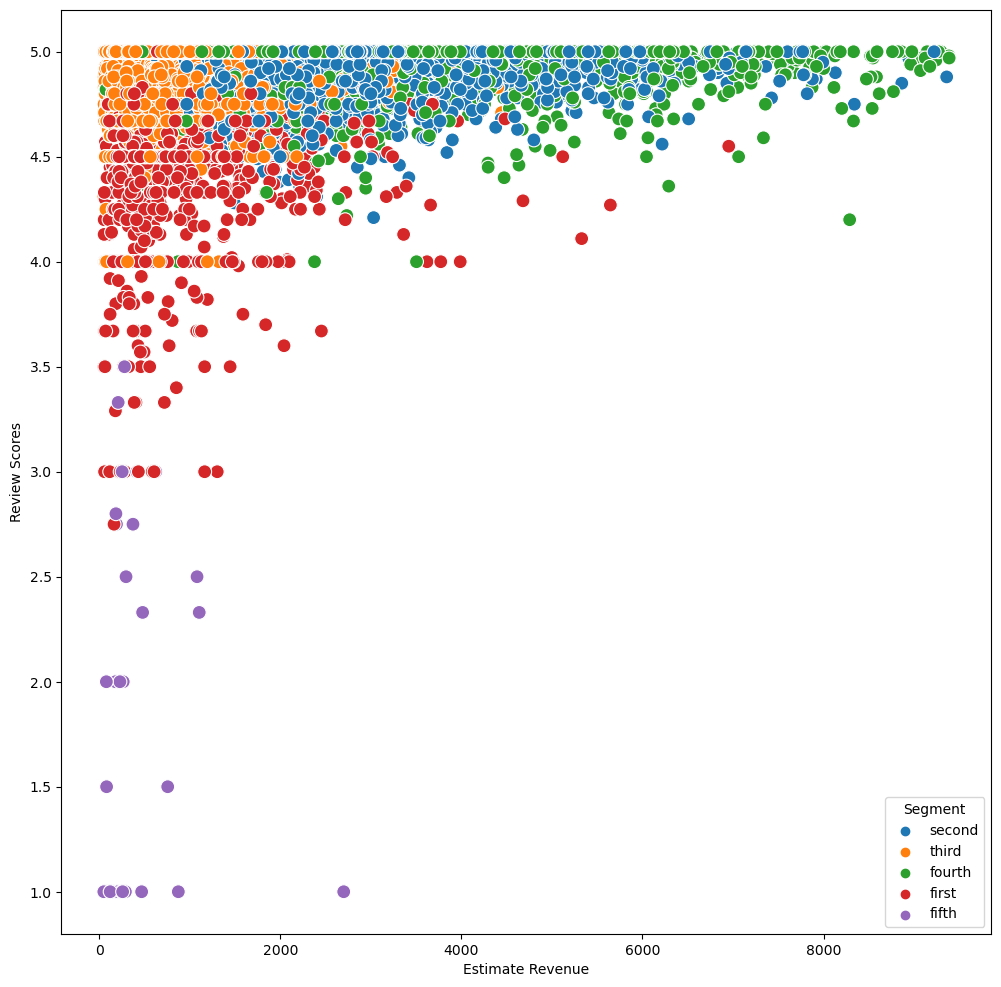

In [34]:
# Plotting clusters for "estimated_revenue" and 'review_scores'

plt.figure(figsize=(12,12))
ax = sns.scatterplot(x=df_pca_kmeans['estimated_revenue'], y=df_pca_kmeans['review_scores'], hue=df_pca_kmeans['Segment'], s=100)

ax.grid(False) 
plt.xlabel('Estimate Revenue') 
plt.ylabel('Review Scores') 
plt.show()

Fifth and first segments set the floor on review scores.

#### Plotting clusters for "price" and "number_of_reviews"

plt.figure(figsize=(12,12))
ax = sns.scatterplot(x=df_pca_kmeans['price'],
                     y=df_pca_kmeans['number_of_reviews'], hue=df_pca_kmeans['Segment'], s=100)

ax.grid(False) 
plt.xlabel('price') 
plt.ylabel('number_of_reviews') 
plt.show()

Second segment dominates review count, fourth segment sets the highest prices.

/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

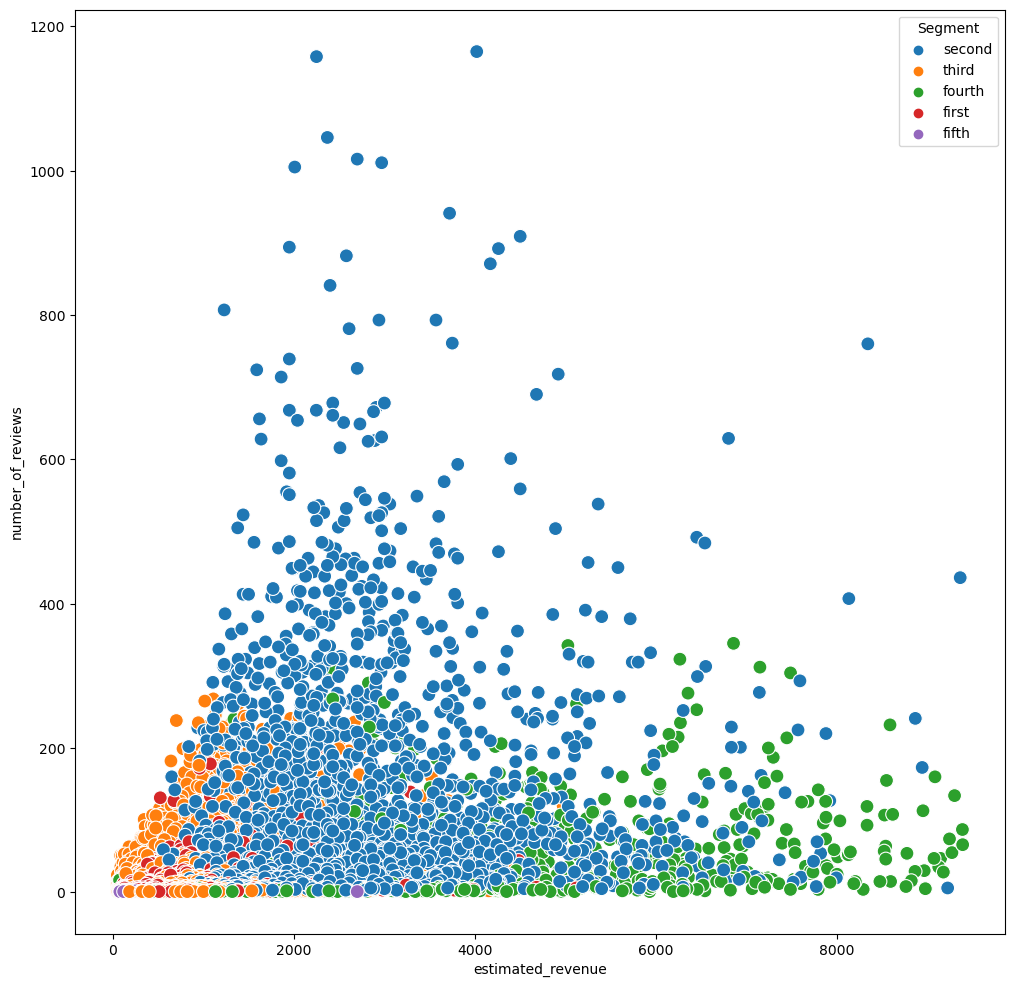

In [35]:
# Plotting clusters for "estimated_revenue" and "number_of_reviews"

plt.figure(figsize=(12,12))
ax = sns.scatterplot(x=df_pca_kmeans['estimated_revenue'],
                     y=df_pca_kmeans['number_of_reviews'], hue=df_pca_kmeans['Segment'], s=100)

ax.grid(False) 
plt.xlabel('estimated_revenue') 
plt.ylabel('number_of_reviews') 
plt.show()

Second and fourth segments are the (ESTIMATED) revenue juggernaughts

### 5. Descriptive Statistics

In [36]:
# Descriptive statistics for key variables by segment:

df_pca_kmeans.groupby('Segment').agg({'accommodates':['mean', 'median'], 
                         'price':['mean', 'median'], 
                         'number_of_reviews':['mean', 'median'],
                         'estimated_revenue':['mean', 'median'],
                         'review_scores':['mean','median'],
                         'est_listing_age':['mean', 'median']})

accommodates              price        number_of_reviews         \
                mean median        mean median              mean median   
Segment                                                                   
fifth       5.368421    4.0  198.052632  125.0          1.789474    1.0   
first       5.111869    4.0  148.272851  104.0         20.185539   10.0   
fourth     11.101787   10.0  509.508936  407.0         40.244755   23.0   
second      4.789341    4.0  129.178984  112.0        137.629462   78.0   
third       4.520083    4.0  176.140005  145.0         32.058986   15.0   

        estimated_revenue          review_scores        est_listing_age         
                     mean   median          mean median            mean median  
Segment                                                                         
fifth          374.272105   238.71      1.915526   2.00        8.631579    5.5  
first          917.160246   658.86      4.345566   4.43       18.803547   13.0  
fourth        3273.376970  2891.70      4.895532   4.95       32.311577   21.0  
second        2876.678522  2580.00      4.883811   4.91       32.658622   20.0  
third          940.172789   806.40      4.907030   4.96       33.687859   20.0

## Takeaways from Descriptive Statistics:

### first segment - new and mediocre listings
- 2nd lowest listing age statistics (in months), only ahead of fifth segment.
- 2nd lowest median estimated revenue, 2nd lowest review scores.

### second segment - established, low margin, high volume.
- highest mean number of reviews by a fair margin, and yet only 3rd in review numbers by median (3rd and fifth categories have wide margin between median and mean)
- lowest average prices by mean, and 2nd lowest (to first segment) in median.
- High review scores, but still 3rd behind fourth and third segment.
- Second highest estimated revenue, behind fourth segment, in both mean and median.

### third segment - middle of everything, checks the box.
- middle in price by mean
- middle by review count
- middle estimated revenue
- curiously, highest review scores
- Also tied for highest median listing age, close first for mean listing age.

### fourth segment - luxury/upscale/ large listings
- highest accomodation numbers by a wide margin: 10+ vs 4-5 for the other segments
- Highest price by a wide margin: median 407 vs other segments in the 100s.
- 2nd highest reviews, but not close to second segment.

### fifth segment - newest/poorly recieved listings.
- only 38 of them so they are outliers.
- poor review scores: 2/5 is way below the 4+/5 for other segments.
- est. listing age below 1 year, lowest of all segments
- lowest review count, lowest estimated revenue.

## 6. Final Analysis ##

## Due to the segmentation analysis, we can see 5 pseudo-distinct categories of listings:
### Poor listings(5th), Mediocre listings(1st), Average Listings (3rd), Volume Overachievers (2nd), and Luxury Listings (4th).

#### Further analysis and exploration would do well to add/reincorporate variables from previous iterations of the dataset, or even incorporate new datasets, to illuminate more insights on further information regarding the 5 segments.

##### For example, does a certain neighborhood have mostly one segment of listing? Besides reviews, what differentiates the Volume Overachievers with the average listing? What about average stay, can we incorporate some new variable to account for an estimate stay length?


In [40]:
df_pca_kmeans.to_csv(os.path.join(path,'02 Data', 'Prepared Data','listings_clustered.csv'))